<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [1]:
# # # panas profiling이 실행되지 않을 시 설치/업그레이드 진행
# !pip install pandas-profiling==2.11.0 --upgrade

# # # 설치되어 있지 않을 경우 아래의 코드 실행 (설치되어 있다면 PASS)
# !pip install category_encoders

     |████████████████████████████████| 243 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 6.6 MB/s eta 0:00:011
     |████████████████████████████████| 121 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 5.4 MB/s eta 0:00:01     |████████████████████▊           | 1.4 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 7.8 MB/s eta 0:00:01
Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
Using legacy 'setup.py install' f

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)

### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.
- **범주형 특성으로 원핫인코딩이 꼭 필요한 특성의 갯수를 과제 제출폼에 제출하세요.**

In [3]:
# 데이터셋 확인 (rows, columns)
print(df.shape)
df.head()

(42515, 9)


,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
# 판다스 프로파일링 실행하여 간단히 EDA
df.profile_report()

# Variables확인 : categorical은 총 4개 

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2) 범주형 변수들에 대해 one-hot encoding(category_encoders)을 수행하고 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), 파라미터는 use_cat_names = True 사용
- 데이터 분리는 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) 을 사용해 주세요. 사용해야 하는 파라미터는 test_size, train_size, random_state=2 입니다. 나머지는 default 사용합니다.
- **분리된 학습데이터의 첫번째 샘플의 인덱스 값를 과제 제출폼에 제출하세요.**


In [11]:
# 데이터셋 정리 : 컬럼 순서 재정의
df_target = df[['Price']]
df_features = df[['Rooms','Type', 'Method', 'Postcode', 'Regionname', 'Propertycount',	'Distance',	'CouncilArea']]

In [12]:
# 타겟 데이터 : 주택 가격
df_target.head()

,Price
0,1490000.0
1,1220000.0
2,1420000.0
3,1515000.0
4,670000.0


In [13]:
# 피쳐(특성) 데이터 : 타겟(주택 가격)을 제외한 모든 컬럼
df_features.head()

,Rooms,Type,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [14]:
# 데이터셋 분리 - train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=2)

In [15]:
# OneHotEncoder
from category_encoders import OneHotEncoder

# categorical -> onehot encoding
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
# onehot 실행 여부 확인 & 학습 데이터 첫 번재 샘플의 인덱스 값 확인 -> 602
X_train.head()

,Rooms,Type_h,Type_u,Type_t,Method_S,Method_VB,Method_SP,Method_PI,Method_SA,Postcode,...,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Melton City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Casey City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Murrindindi Shire Council
602,4,1,0,0,1,0,0,0,0,3106,...,0,0,0,0,0,0,0,0,0,0
40851,5,1,0,0,1,0,0,0,0,3169,...,0,0,0,0,0,0,0,0,0,0
57233,4,1,0,0,0,1,0,0,0,3028,...,0,0,0,0,0,0,0,0,0,0
8816,4,1,0,0,1,0,0,0,0,3033,...,0,0,0,0,0,0,0,0,0,0
3481,3,1,0,0,1,0,0,0,0,3076,...,0,0,0,0,0,0,0,0,0,0


### 3) SelectKBest를 사용해서 20개의 특성만 selection 하세요
- score_func 에는 f_regression을 사용합니다
- **가장 스코어(Attributes: scores_ 사용)가 높게 나온 특성의 이름을 과제 제출폼에 제출하세요.**

In [19]:
# f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의. 20개를 찾을 것이기에 k=20설정
selector = SelectKBest(score_func=f_regression, k=20)

## 학습 데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터 transform
X_test_selected = selector.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

# 선택된 특성들
selected_names = all_names[selected_mask]

# 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

# 어떤 컬럼이 선택/안 선택 되었는지 훑어보기
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Melton City Council'],
      dtype='object')
Unselected names:  Index(['Type_t', 'Method_S', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'CouncilArea_Kingston City Council',

In [21]:
import numpy as np

# selctor에서 점수 추출 (배열)
score = selector.scores_

# 가장 높은 점수의 인덱스 번호 추출
best_score_index = np.argmax(score)

# 학습 데이터셋 컬럼에서 인덱스번호에 해당하는 컬럼 이름 확인
all_names[best_score_index]

'Rooms'

### 4) RidgeCV를 사용해서 회귀모델을 만들어 보세요
- attribute는 normalize=True, cv=5를 사용하세요. 나머지는 default
- **alphas = [0, 0.001, 0.01, 0.1, 1] 을 시도해보고 가장 좋은 점수가 나온 alpha 값을 과제 제출폼에 제출하세요.**

In [22]:
# best_score_ 가 동작 안 할 경우 아래의 코드 실행 후 런타임 재시작 진행
# !pip install --upgrade scikit-learn==0.24.1

In [26]:
from sklearn.linear_model import RidgeCV

# 주어진 알파값을 리스트에 담기
alphas = [0, 0.001, 0.01, 0.1, 1] 

# ridgeCV 모델 생성 - normalize=True, cv=5
ridge = RidgeCV(alphas=alphas, normalize=True, cv=5)

# 모델 훈련
ridge.fit(X_train_selected, y_train)

# alpha_, best_score_ 속성을 이용하여 가장 좋은 점수 및 해당 알파값 도출
print("alpha :", ridge.alpha_)
print("best score :", ridge.best_score_)

alpha : 0.001
best score : 0.5510507608242425


### 5) 테스트셋에 대한 MAE 값을 계산하고 모델이 잘 만들어졌는지 확인해 보세요.
- **테스트셋에 대한 MAE 값을 과제 제출폼에 제출하세요.**

In [27]:
# 테스트 피쳐 데이터를 앞서 훈련한 모델에 넣어 예측값 도출
y_pred = ridge.predict(X_test_selected)

# 테스트 타깃 데이터와 예측 데이터를 가지고 평균 절대 오차 구하기 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print("MAE :", mae)

MAE : 262857.31981090386


## 🔥 도전과제

### 6) best ridge regression model을 만드세요.
    - 특성의 갯수에 제한이 없습니다.
    - 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요
    - 만든 모델의 특징을 간략히 설명하고 테스트세트 성능 결과를 메신저에서 공유하세요

In [28]:
# feature의 개수를 어떻게 정할 것인가? -> MAE 값을 비교하여 정하기

# 패키지
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 아래 셀에서 시각화를 위한 list & 범위 생성
training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 특성 개수를 조합하여 비교해보기
for k in range(1, len(X_train.columns)+ 1):
    
    # feature개수 확인 
    print(f'{k} features')
    
    # SelecteKBest 객체 생성 -> k는 순차적으로 up
    selector = SelectKBest(score_func=f_regression, k=k)
    
    # 훈련용 데이터 : fit_transform, 테스트 데이터 : transform
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # 어떤 features가 선택되었는지?
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    # 해당 features를 골라 모델 학습 및 MAE확인
    model = LinearRegression()              # check : 왜 Linear 였는가
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

1 features
Selected names:  Index(['Rooms'], dtype='object')
Test MAE: $379,997
Test R2: 0.1759798243046662 

2 features
Selected names:  Index(['Rooms', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $341,051
Test R2: 0.35510596527877447 

3 features
Selected names:  Index(['Rooms', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $337,588
Test R2: 0.38041323213249645 

4 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $336,730
Test R2: 0.3882513576415394 

5 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $329,518
Test R2: 0.40572570221689164 

6 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $298,643
T

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $295,972
Test R2: 0.4937634813298236 

8 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')
Test MAE: $292,931
Test R2: 0.50037975121771 

9 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')
Test MAE: $273,339
Test R2: 0.5441666971052252 

10 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionn

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Bayside City Council'],
      dtype='object')
Test MAE: $264,985
Test R2: 0.5634316369845829 

15 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_SP',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Test MAE: $262,811
Test R2: 0.5678673820196246 

20 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Melton City Council'],
      dtype='object')
Test MAE: $262,917
Test R2: 0.569163753534192 

21 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan',

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Victoria',
       'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Greater Dandenong City Council'],
      dtype='object')
Test MAE: $261,097
Test R2: 0.5722664928552896 

25 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t',

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Victoria',
       'Regionname_Northern Victoria', 'Distance',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Moreland City Council', 'CouncilArea_Wyndham City Council',
       'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Casey City Council'],
      dtype

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Moreland City Council', 'CouncilArea_Wyndham City Council',
       'CouncilArea_Bayside City Council',
       'CouncilArea_Maribyrnong City Council',
       'Council

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

Test MAE: $258,466
Test R2: 0.5806710462606935 

36 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Banyule City Council', 'CouncilArea_Moreland City Council',
       'CouncilArea_Wyndham City Council',
 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test MAE: $257,341
Test R2: 0.5824165489856568 

39 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Method_PI', 'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Banyule City Council', 'CouncilArea_Moreland City Council',
       'CouncilArea_Wyndham Cit

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test MAE: $256,345
Test R2: 0.5839682063622669 

42 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Method_PI', 'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Banyule City Council', 'CouncilArea_Moreland City Council

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test MAE: $256,088
Test R2: 0.585404758735071 

45 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Method_PI', 'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Kingston City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Banyule City C

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test MAE: $256,058
Test R2: 0.585524982544919 

48 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_VB', 'Method_SP',
       'Method_PI', 'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Kingston City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Banyule City C

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test MAE: $255,661
Test R2: 0.5872068862880115 

51 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_S', 'Method_VB',
       'Method_SP', 'Method_PI', 'Method_SA',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Kingston City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council', 'CouncilArea_Yarra City Council',
 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Type_t', 'Method_S', 'Method_VB',
       'Method_SP', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'Distance', 'CouncilArea_Manningham City Council',
       'CouncilArea_Kingston City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Boroondara City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Banyule City Council', 'Counci

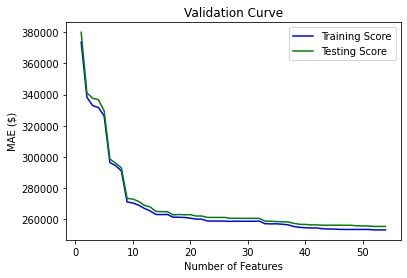

In [ ]:
# features 개수가 9개일 때 MAE가 급격히 줄어들었다.
# features 개수가 9개일 때 보다 10개일 경우에 MAE와 R2 score가 조금 개선되었다.

# MAE 변화 추이를 시각화로 살펴보기
import matplotlib.pyplot as plt
plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [29]:
# feature - 10개 선택

# SelecteKBest 객체 생성
selector_10 = SelectKBest(score_func=f_regression, k=10)
    
# 훈련용 데이터 : fit_transform, 테스트 데이터 : transform
X_train_selected_10 = selector_10.fit_transform(X_train, y_train)
X_test_selected_10 = selector_10.transform(X_test)
    
# 어떤 features가 선택되었는지 확인
all_names = X_train.columns
selected_mask = selector_10.get_support()
selected_names = all_names[selected_mask]
print('10 features selected - names: ', selected_names)

10 features selected - names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
# 다항회귀 & RidgeCV 사용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# 여러 람다값은 alpha 인자값을 다양하게 시도해본다. -> 여기서는 0부터 1까지, 0.01단위로 증가하며 비교
alphas = np.arange(0, 1, 0.01)

# RidgeCV 객체 생성 및 모델 훈련
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train_selected_10, y_train)

# 테스트용 데이터로 예측값 계산
y_pred_10 = model.predict(X_test_selected_10)

# 예측값과 테스트용 데이터의 target값을 비교하여 모델 평가
mae = mean_absolute_error(y_test, y_pred_10)
r2 = r2_score(y_test, y_pred_10)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

# 다항회귀를 통해 늘어난 피쳐 수 확인
coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs[0])}')

# 최적의 alpha값 & best_score 확인
print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Test MAE: $226,991
R2 Score: 0.6525

Number of Features: 286
alpha: 0.08
cv best score: 0.6409649430100522


In [31]:
# 비교 1) : 람다값이 0일 때
model_alpha_0 = RidgeCVRegression(alphas=[0], normalize=True, cv=5)

# 모델 훈련
model_alpha_0.fit(X_train_selected_10, y_train)

# 예측값 도출
y_pred_alpha_0 = model_alpha_0.predict(X_test_selected_10)

# 오차 확인
mae = mean_absolute_error(y_test, y_pred_alpha_0)
r2 = r2_score(y_test, y_pred_alpha_0)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')
print(f'cv best score: {model_alpha_0.named_steps["ridgecv"].best_score_}')

# R2 스코어는 다소 높아졌으나, best_score는 오히려 줄어들었다.

Test MAE: $219,734
R2 Score: 0.6700

cv best score: -0.3374003332880889


In [33]:
# 비교 2) : 다중회귀일때 
from  sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))
    
# 모델 생성 및 학습    
poly = PolynomialRegression(normalize=True)
poly.fit(X_train_selected_10, y_train)

# 예측값
y_pred_linear_10 = poly.predict(X_test_selected_10)


# 오차 확인
mae = mean_absolute_error(y_test, y_pred_linear_10)
r2 = r2_score(y_test, y_pred_linear_10)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

Test MAE: $219,650
R2 Score: 0.6699

